In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df =pd.read_csv('mymoviedb.csv', lineterminator='\n')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [25]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [27]:
df.duplicated().sum()

0

In [29]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


Exploration Summary
• we have a dataframe of 9827 rows and 9 columns.
• our dataset looks a bit tidy with no NaNs nor duplicated values.
• Release_Date column needs to be cast into date time and to extract only the
• Overview, Original_Languege, and Poster-Url wouldn't be so useful during analysis
• there are noticeable outliers in the Popularity column
• Vote_Average better be categorized for proper analysis.
• Genre column has separate values and white spaces that need to be handled

In [32]:
#  Data cleaning

Casting Relase_date column and extracting year value

In [37]:
df['Release_Date'] = pd. to_datetime(df['Release_Date'])

#confirming the changes
print(df['Release_Date'].dtype)

datetime64[ns]


In [46]:
df['Release_Date'] = df['Release_Date'].dt.year
df['Release_Date']. dtype

dtype('int32')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   int32  
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int32(1), int64(1), object(5)
memory usage: 652.7+ KB


Dropping Overview, Original_Languege
and Poster-Url

In [57]:
#listing Columns that need to be dropped

cols = ['Overview', 'Original_Language', 'Poster_Url']


In [59]:
# dropping columns and confirming changes
df.drop(cols, axis = 1, inplace = True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [61]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


categorizing Vote_Average column
We would cut the Vote_Average values and make 4 categories: popular average
below_avg not_popular to describe it more using catigorize_col() function
provided above

dDivide the column into 4 bins (quartiles):
0% to 25% (lowest values)
25% to 50%
50% to 75%
75% to 100% (highest values)
Assign custom labels you provide to those bins.
Add a new column to your DataFrame with those category labels.
🔍 What Each Part Does
quantile([0, 0.25, 0.5, 0.75, 1.0])

This gets the actual values at the 0th, 25th, 50th, 75th, and 100th percentiles.
That’s what defines the 4 quartiles.
pd.cut()

This function takes the numeric values and splits them into the ranges we defined above, and labels them.
include_lowest=True

Ensures the lowest value in your data isn't left out of the first bin.
This block:

for i in range(1, len(q)):
    if q[i] <= q[i - 1]:
        q[i] = q[i - 1] + 1e-5
It fixes a common bug: if two quartiles have the same value (because of repeated data), pd.cut() throws an error. So this adds a tiny nudge (1e-5) to keep bins unique.



In [84]:
def categorize_col(df, col, labels):
    """
    Categorizes a numeric column based on its quartiles.

    Args:
        df (pd.DataFrame): DataFrame to process
        col (str): Column to be categorized
        labels (list): List of 4 labels for the quartile bins (from low to high)

    Returns:
        pd.DataFrame: Updated DataFrame with a new column {col}_category
    """
    if len(labels) != 4:
        raise ValueError("Please provide exactly 4 labels for the quartiles.")
    
    # Get quartiles
    q = df[col].quantile([0, 0.25, 0.5, 0.75, 1.0]).values

    # Ensure unique edges (avoid issues with duplicate min/max)
    for i in range(1, len(q)):
        if q[i] <= q[i - 1]:
            q[i] = q[i - 1] + 1e-5

    # Create the new categorized column
    df[f'{col}_category'] = pd.cut(df[col], bins=q, labels=labels, include_lowest=True)

    return df


In [86]:
labels = ['not_popular', 'below_avg', 'average', 'popular']
df = categorize_col(df, 'Vote_Average', labels)


In [88]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Vote_Average_category
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction",popular
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller",popular
2,2022,No Exit,2618.087,122,6.3,Thriller,below_avg
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy",popular
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War",average


In [91]:
#exploring columns
df['Vote_Average'].value_counts()

Vote_Average
6.4     435
6.3     429
6.5     427
6.8     423
6.7     420
       ... 
2.2       1
9.2       1
1.5       1
3.1       1
10.0      1
Name: count, Length: 74, dtype: int64

In [93]:
# dropping NaNs
df.dropna(inplace = True)
# confirming
df.isna().sum()

Release_Date             0
Title                    0
Popularity               0
Vote_Count               0
Vote_Average             0
Genre                    0
Vote_Average_category    0
dtype: int64

In [95]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Vote_Average_category
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction",popular
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller",popular
2,2022,No Exit,2618.087,122,6.3,Thriller,below_avg
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy",popular
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War",average


we'd split genres into a list and then
explode our dataframe to have only one
genre per row for ezch movie

In [100]:
#split the string into list
df['Genre'] =df['Genre'].str.split(', ')

df = df.explode('Genre').reset_index(drop=True)
df.head(14)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Vote_Average_category
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action,popular
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure,popular
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction,popular
3,2022,The Batman,3827.658,1151,8.1,Crime,popular
4,2022,The Batman,3827.658,1151,8.1,Mystery,popular
5,2022,The Batman,3827.658,1151,8.1,Thriller,popular
6,2022,No Exit,2618.087,122,6.3,Thriller,below_avg
7,2021,Encanto,2402.201,5076,7.7,Animation,popular
8,2021,Encanto,2402.201,5076,7.7,Comedy,popular
9,2021,Encanto,2402.201,5076,7.7,Family,popular


In [102]:
# casting column into category
df['Genre'] = df['Genre'].astype('category')
# confirming changes
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25793 entries, 0 to 25792
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Release_Date           25793 non-null  int32   
 1   Title                  25793 non-null  object  
 2   Popularity             25793 non-null  float64 
 3   Vote_Count             25793 non-null  int64   
 4   Vote_Average           25793 non-null  float64 
 5   Genre                  25793 non-null  category
 6   Vote_Average_category  25793 non-null  category
dtypes: category(2), float64(2), int32(1), int64(1), object(1)
memory usage: 958.2+ KB


In [108]:
df.nunique()

Release_Date              102
Title                    9513
Popularity               8160
Vote_Count               3266
Vote_Average               74
Genre                      19
Vote_Average_category       4
dtype: int64

Now that our dataset is clean and tidy, we are left with a total of 6 columns and 25551
rows to dig into during our analysis

Data Visualization
here, we'd use Matplotlib and seaborn for making some informative visuals to gain
insights abut our data.

In [116]:
#setting up seaborn Configuration

sns.set_style('whitegrid')

Q1: What is the most frequent genre in
the dataset?

In [119]:
df['Genre'].describe()

count     25793
unique       19
top       Drama
freq       3744
Name: Genre, dtype: object

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


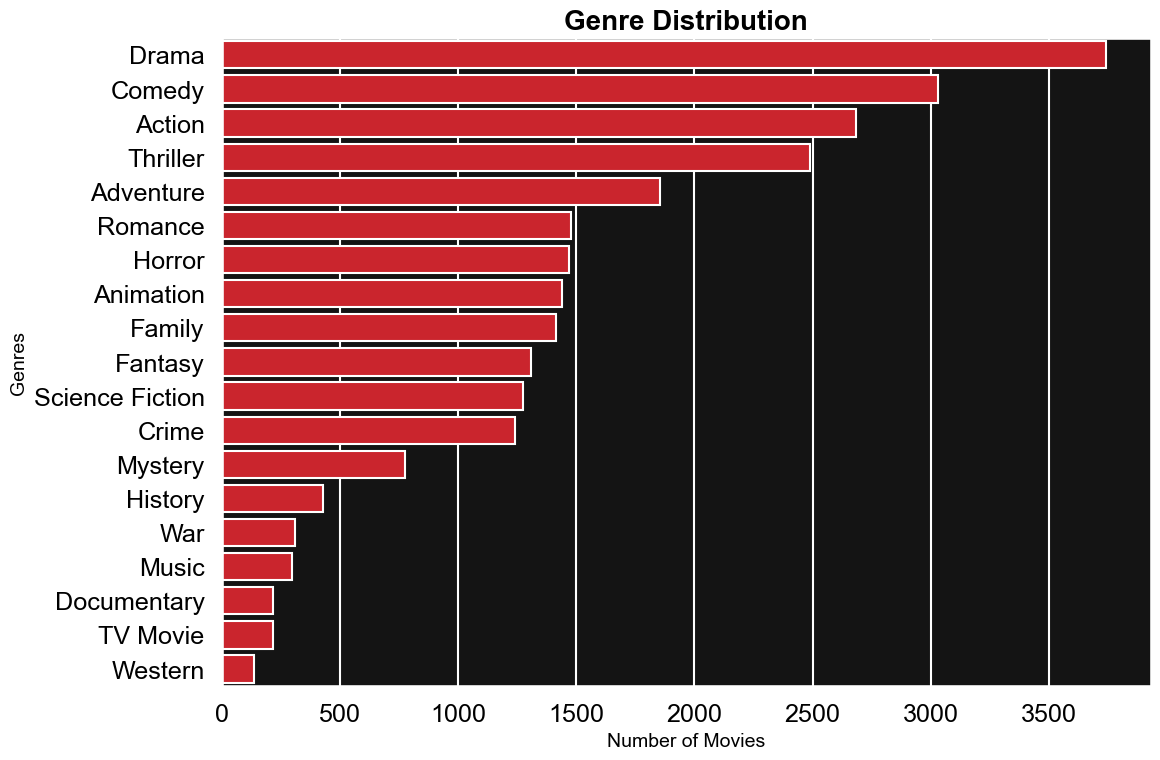

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Netflix-style theme
plt.style.use('dark_background')
sns.set_context('talk', font_scale=1.1)
sns.set_style("darkgrid", {"axes.facecolor": "#141414"})

# Set up the plot size
plt.figure(figsize=(12, 8))

# Plot countplot
sns.countplot(
    y='Genre',
    data=df,
    order=df['Genre'].value_counts().index,
    color='#E50914'  # Netflix red
)

# Fix axis labels and title
plt.title('Genre Distribution', fontsize=20, color='Black', weight='bold')
plt.xlabel('Number of Movies', fontsize=14, color='Black')
plt.ylabel('Genres', fontsize=14, color='Black')

# Fix tick label colors
plt.xticks(color='Black')
plt.yticks(color='Black')

# Fix emoji font issue: replace emoji with plain text
# (or you can install a custom font if you really want the emoji to work)

# Clean layout
plt.tight_layout()
plt.show()




we can notice from the above visual that Drama genre is the most frequent genre
in our dataset and has appeared more than 14% of the times among 19 other
genres

Q2: What genres has highest votes?


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


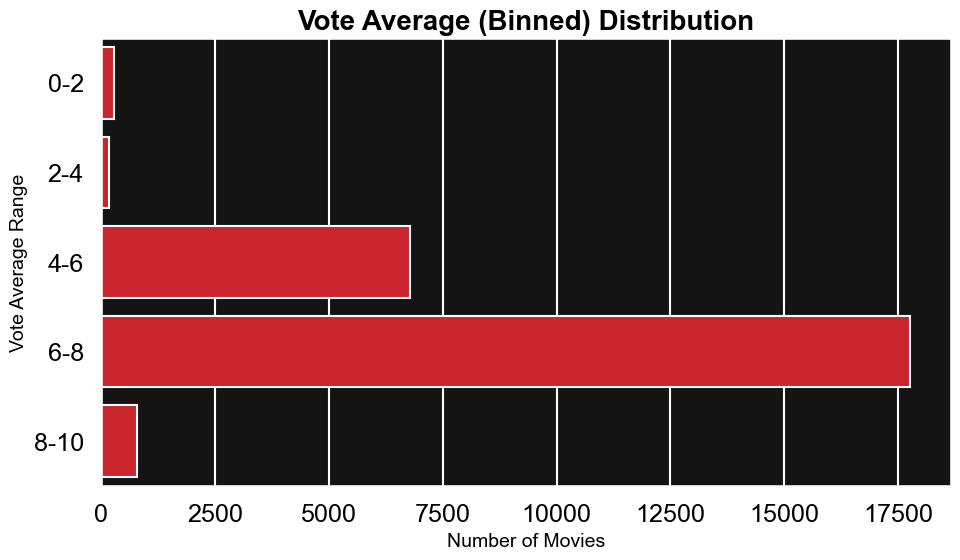

In [163]:
bins = [0, 2, 4, 6, 8, 10]
labels = ['0-2', '2-4', '4-6', '6-8', '8-10']
df['Vote_Average_Binned'] = pd.cut(df['Vote_Average'], bins=bins, labels=labels, include_lowest=True)

plt.style.use('dark_background')
sns.set_context('talk', font_scale=1.1)
sns.set_style("darkgrid", {"axes.facecolor": "#141414"})

plt.figure(figsize=(10, 6))
sns.countplot(
    y='Vote_Average_Binned',
    data=df,
    order=labels,
    color='#E50914'
)

plt.title('Vote Average (Binned) Distribution', fontsize=20, color='Black', weight='bold')
plt.xlabel('Number of Movies', fontsize=14, color='Black')
plt.ylabel('Vote Average Range', fontsize=14, color='Black')
plt.xticks(color='Black')
plt.yticks(color='Black')
plt.tight_layout()
plt.show()


What movie got the highest popularity? what's its
genre?



In [174]:
#checking max popularity in dataset
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Vote_Average_category,Vote_Average_Binned
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action,popular,8-10
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure,popular,8-10
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction,popular,8-10


Q4: What movie got the lowest popularity? what's
its genre?


In [177]:
# checking max popularity in dataset
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Vote_Average_category,Vote_Average_Binned
25787,2021,The United States vs. Billie Holiday,13.354,152,6.7,Music,average,6-8
25788,2021,The United States vs. Billie Holiday,13.354,152,6.7,Drama,average,6-8
25789,2021,The United States vs. Billie Holiday,13.354,152,6.7,History,average,6-8
25790,1984,Threads,13.354,186,7.8,War,popular,6-8
25791,1984,Threads,13.354,186,7.8,Drama,popular,6-8
25792,1984,Threads,13.354,186,7.8,Science Fiction,popular,6-8


Q5: Which year has the most filmmed movies?


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


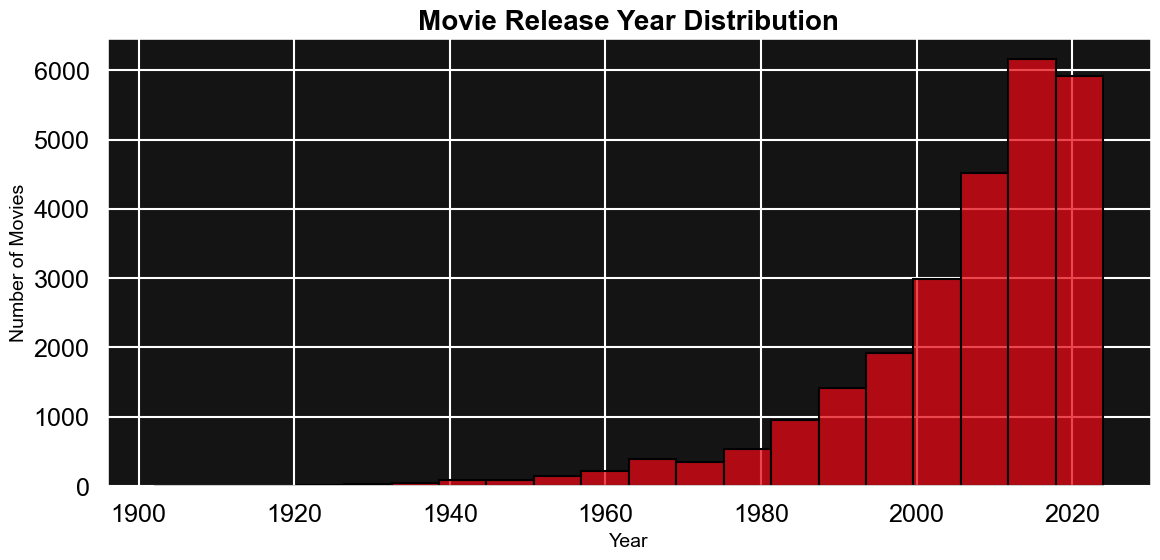

In [189]:
plt.style.use('dark_background')
sns.set_context('talk', font_scale=1.1)
sns.set_style("darkgrid", {"axes.facecolor": "#141414"})

# Set figure size
plt.figure(figsize=(12, 6))

# Plot histogram
sns.histplot(
    data=df,
    x='Release_Date',
    bins=20,  # Adjust bins for better granularity
    color='#E50914',  # Netflix red
    edgecolor='black'
)

# Title and labels
plt.title('Movie Release Year Distribution', fontsize=20, color='Black', weight='bold')
plt.xlabel('Year', fontsize=14, color='Black')
plt.ylabel('Number of Movies', fontsize=14, color='Black')

# Tick color
plt.xticks(color='Black')
plt.yticks(color='Black')

# Layout
plt.tight_layout()
plt.show()

Conclusion

Q1: What is the most frequent genre in the dataset?
-> The drama genre is the most frequent in our dataset and has appeared more than
14% of the time among 19 other genres.


Q2: What genre has the highest votes?
We have 25.5% of our dataset with a popular vote (6520 rows). Drama again gets the
highest popularity among fans by having more than 18.5% of movie popularities.


Q3: What movie got the highest popularity? What's its genre?
Spider-Man: No Way Home has the highest popularity rate in our dataset and it has
genres of Action, Adventure, and Science Fiction.


Q4: What movie got the lowest popularity? What's its genre?
The united states, thread' has the highest lowest rate in our dataset
and it has genres of music, drama, 'war', 'sci-fi' and history`.


Q5: Which year has the most filmed movies?
The year 2020 has the highest filming rate in our dataset.